# Importing Libraries

In [4]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Datasets

In [5]:
readdata=pd.read_csv(r"C:\Users\adhit\ML Data sets\Inhouse project\heart.csv")
data = pd.DataFrame(readdata)
#data = data.drop([87,166,192,266,287,302],axis=0)
print(data.head())
print(data.shape)
print(data['target'].value_counts())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)
1    526
0    499
Name: target, dtype: int64


In [22]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<AxesSubplot:xlabel='cp', ylabel='target'>

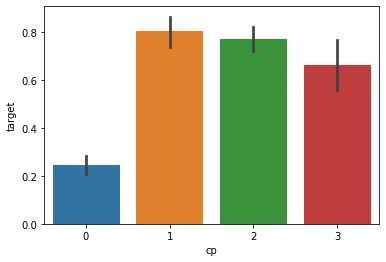

In [4]:
sns.barplot(x = 'cp', y = 'target', data = data)

<AxesSubplot:xlabel='sex', ylabel='target'>

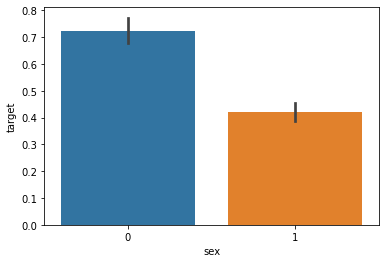

In [5]:
sns.barplot(x = 'sex', y = 'target', data = data)

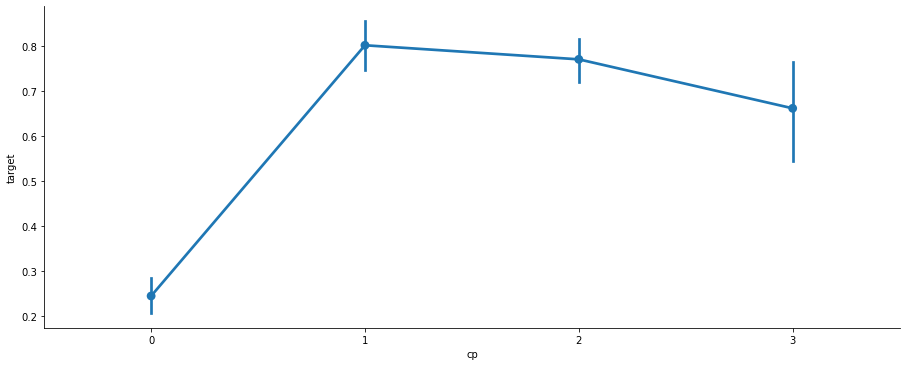

In [6]:
axes = sns.factorplot('cp','target', 
                      data=data, aspect = 2.5, )

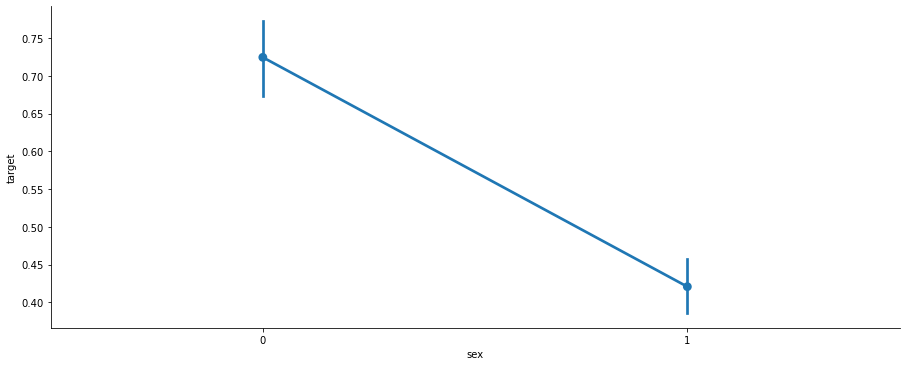

In [7]:
axes = sns.factorplot('sex','target', 
                      data=data, aspect = 2.5, )

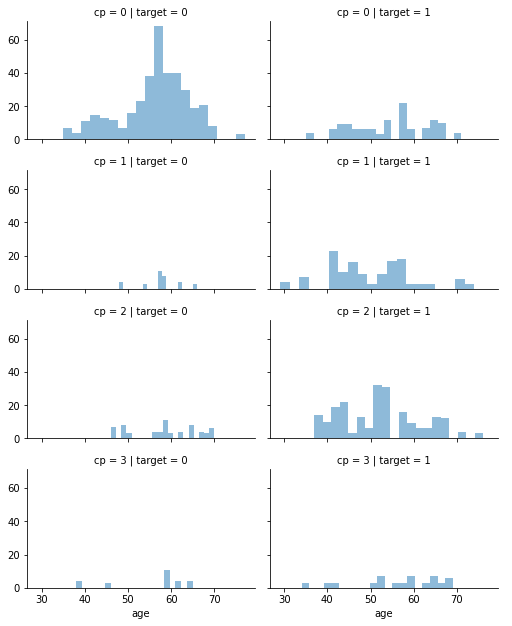

In [8]:
grid = sns.FacetGrid(data, col='target', row='cp', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

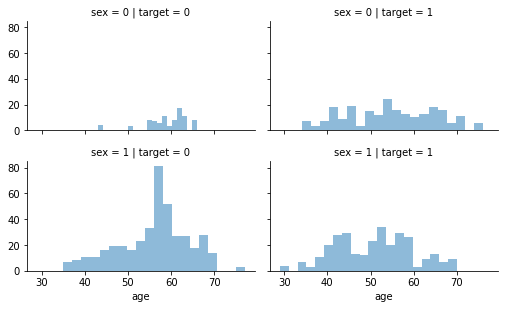

In [9]:
grid = sns.FacetGrid(data, col='target', row='sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

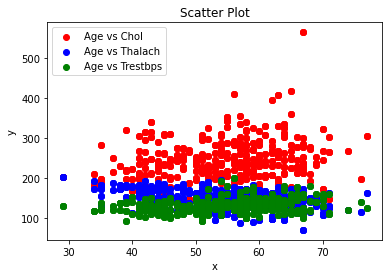

In [10]:
plt.scatter('age','chol', data = data, label='Age vs Chol',color='r')
plt.scatter('age','thalach', data = data, label='Age vs Thalach',color='b')
plt.scatter('age','trestbps', data = data, label='Age vs Trestbps',color='g')
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
newdata=data.dropna(axis=0,how='any')
print(newdata.shape)
X = data.drop('target', axis=1)
Y = data['target']
Y1=list(Y)
#Y = list(map(lambda x: 1 if x>0 else 0,Y1))
#newx=pd.DataFrame(data.ix[:,[0,1,2,4,5,8,9,10,11]])
#newx=data[data.columns[6]]
#print(newx)
#X = newx
Y=pd.DataFrame(Y)
print(X.shape)
print(Y.shape)
print(Y)
type(X)
type(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
print(X_train.mean(), X_test.mean(), X.mean())

(1025, 14)
(1025, 13)
(1025, 1)
      target
0          0
1          0
2          0
3          0
4          0
...      ...
1020       1
1021       0
1022       0
1023       1
1024       0

[1025 rows x 1 columns]
(717, 13) (308, 13) (717, 1) (308, 1)
age          54.334728
sex           0.670851
cp            0.921897
trestbps    131.690377
chol        246.640167
fbs           0.152022
restecg       0.545328
thalach     149.377964
exang         0.340307
oldpeak       1.071967
slope         1.386332
ca            0.754533
thal          2.327755
dtype: float64 age          54.665584
sex           0.753247
cp            0.990260
trestbps    131.428571
chol        244.509740
fbs           0.142857
restecg       0.493506
thalach     148.500000
exang         0.327922
oldpeak       1.070455
slope         1.383117
ca            0.753247
thal          2.314935
dtype: float64 age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs   

In [9]:
initial_number_of_data_points = len(X)


def get_unique(X_matrix, y_vector):
    Xy = list(set(list(zip([tuple(x) for x in X_matrix], y_vector))))
    X_matrix = [list(l[0]) for l in Xy]
    y_vector = [l[1] for l in Xy]
    return X_matrix, y_vector


X, Y = get_unique(X, Y)
data_points_removed = initial_number_of_data_points - len(X)
print("Number of duplicates removed:", data_points_removed )

Number of duplicates removed: 1024


# Multi-Layer Perceptron Classifier

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
nnclassifier = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(13,15,20,15,13), random_state=1, max_iter=200)
nnclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = nnclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)

print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=nnclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=nnclassifier,algorithm="SAMME",n_estimators=150)

def run_kfold(clf):
    kf = KFold(10, shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
        
run_kfold(baggclassifier)

83.76623376623377
83.54430379746836
84.61538461538461
0.840764331210191
Bagging Classifier
Boosting Classifier
Fold 1 accuracy: 0.8640776699029126
Fold 1 precision: 0.8333333333333334
Fold 1 recall: 0.9
Fold 1 f1: 0.8653846153846153
Mean Accuracy: 0.8640776699029126
Mean Precision: 0.8333333333333334
Mean Recall: 0.9
Mean F1: 0.8653846153846153


KeyboardInterrupt: 

# Support Vector Classifier (kernel = "linear")

In [14]:
from sklearn.svm import SVC  
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = svclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print("Accuracy=",accuracy*100)
print("Precision=",precision*100)
print("Recall=",recall*100)
print("F1=",f1)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=svclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=svclassifier,algorithm="SAMME",n_estimators=150)
print("K Fold Validation")
def run_kfold(clf):
    #kf = KFold(303, n_folds=10)
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))

run_kfold(boostclassifier)


Accuracy= 84.4155844155844
Precision= 93.0379746835443
Recall= 79.8913043478261
F1= 0.8596491228070176
Bagging Classifier
Boosting Classifier
K Fold Validation
Fold 1 accuracy: 0.8252427184466019
Fold 1 precision: 0.7758620689655172
Fold 1 recall: 0.9
Fold 1 f1: 0.8333333333333334
Mean Accuracy: 0.8252427184466019
Mean Precision: 0.7758620689655172
Mean Recall: 0.9
Mean F1: 0.8333333333333334
Fold 2 accuracy: 0.8349514563106796
Fold 2 precision: 0.8064516129032258
Fold 2 recall: 0.9090909090909091
Fold 2 f1: 0.8547008547008547
Mean Accuracy: 0.8300970873786407
Mean Precision: 0.7911568409343714
Mean Recall: 0.9045454545454545
Mean F1: 0.844017094017094
Fold 3 accuracy: 0.8640776699029126
Fold 3 precision: 0.8484848484848485
Fold 3 recall: 0.9333333333333333
Fold 3 f1: 0.888888888888889
Mean Accuracy: 0.8414239482200646
Mean Precision: 0.8102661767845305
Mean Recall: 0.914141414141414
Mean F1: 0.858974358974359
Fold 4 accuracy: 0.7864077669902912
Fold 4 precision: 0.7719298245614035
Fol

# Support Vector Classifier (kernel = "rbf")

In [9]:
from sklearn.svm import SVC  
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = svclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print("Accuracy=",accuracy*100)
print("Precision=",precision*100)
print("Recall=",recall*100)
print("F1=",f1)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=svclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=svclassifier,algorithm="SAMME",n_estimators=150)
print("K Fold Validation")
def run_kfold(clf):
    #kf = KFold(303, n_folds=10)
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))

run_kfold(boostclassifier)


Accuracy= 71.70731707317073
Precision= 78.0952380952381
Recall= 70.08547008547008
F1= 0.7387387387387386
Bagging Classifier
Boosting Classifier
K Fold Validation
Fold 1 accuracy: 0.4854368932038835
Fold 1 precision: 0.4854368932038835
Fold 1 recall: 1.0
Fold 1 f1: 0.6535947712418301
Mean Accuracy: 0.4854368932038835
Mean Precision: 0.4854368932038835
Mean Recall: 1.0
Mean F1: 0.6535947712418301
Fold 2 accuracy: 0.5339805825242718
Fold 2 precision: 0.5339805825242718
Fold 2 recall: 1.0
Fold 2 f1: 0.6962025316455696
Mean Accuracy: 0.5097087378640777
Mean Precision: 0.5097087378640777
Mean Recall: 1.0
Mean F1: 0.6748986514436999
Fold 3 accuracy: 0.5825242718446602
Fold 3 precision: 0.5825242718446602
Fold 3 recall: 1.0
Fold 3 f1: 0.7361963190184049
Mean Accuracy: 0.5339805825242718
Mean Precision: 0.5339805825242718
Mean Recall: 1.0
Mean F1: 0.6953312073019348
Fold 4 accuracy: 0.5145631067961165
Fold 4 precision: 0.5145631067961165
Fold 4 recall: 1.0
Fold 4 f1: 0.6794871794871795
Mean Acc

# K Nearest Neighbors Classifier (k=2)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
knnclassifier = KNeighborsClassifier(n_neighbors=3)  
knnclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = knnclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=knnclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=knnclassifier,algorithm="SAMME",n_estimators=150)
print("K Fold Validation")
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
run_kfold(baggclassifier)

85.71428571428571
87.9746835443038
84.7560975609756
0.8633540372670808
Bagging Classifier
Boosting Classifier
K Fold Validation
Fold 1 accuracy: 0.9611650485436893
Fold 1 precision: 0.96
Fold 1 recall: 0.96
Fold 1 f1: 0.96
Mean Accuracy: 0.9611650485436893
Mean Precision: 0.96
Mean Recall: 0.96
Mean F1: 0.96
Fold 2 accuracy: 0.9223300970873787
Fold 2 precision: 0.9272727272727272
Fold 2 recall: 0.9272727272727272
Fold 2 f1: 0.9272727272727272
Mean Accuracy: 0.941747572815534
Mean Precision: 0.9436363636363636
Mean Recall: 0.9436363636363636
Mean F1: 0.9436363636363636
Fold 3 accuracy: 0.941747572815534
Fold 3 precision: 1.0
Fold 3 recall: 0.9
Fold 3 f1: 0.9473684210526316
Mean Accuracy: 0.941747572815534
Mean Precision: 0.9624242424242424
Mean Recall: 0.9290909090909091
Mean F1: 0.9448803827751195
Fold 4 accuracy: 0.9514563106796117
Fold 4 precision: 0.9615384615384616
Fold 4 recall: 0.9433962264150944
Fold 4 f1: 0.9523809523809524
Mean Accuracy: 0.9441747572815534
Mean Precision: 0.96

# K Nearest Neighbor Classifier (k=1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
knnclassifier = KNeighborsClassifier(n_neighbors=2)  
knnclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = knnclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=knnclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=knnclassifier,algorithm="SAMME",n_estimators=150)
print("K Fold Validation")
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
run_kfold(baggclassifier)

92.85714285714286
87.9746835443038
97.88732394366197
0.9266666666666666
Bagging Classifier
Boosting Classifier
K Fold Validation
Fold 1 accuracy: 0.9611650485436893
Fold 1 precision: 0.96
Fold 1 recall: 0.96
Fold 1 f1: 0.96
Mean Accuracy: 0.9611650485436893
Mean Precision: 0.96
Mean Recall: 0.96
Mean F1: 0.96
Fold 2 accuracy: 0.941747572815534
Fold 2 precision: 0.9298245614035088
Fold 2 recall: 0.9636363636363636
Fold 2 f1: 0.9464285714285715
Mean Accuracy: 0.9514563106796117
Mean Precision: 0.9449122807017544
Mean Recall: 0.9618181818181818
Mean F1: 0.9532142857142858
Fold 3 accuracy: 0.941747572815534
Fold 3 precision: 1.0
Fold 3 recall: 0.9
Fold 3 f1: 0.9473684210526316
Mean Accuracy: 0.9482200647249192
Mean Precision: 0.9632748538011695
Mean Recall: 0.9412121212121213
Mean F1: 0.951265664160401
Fold 4 accuracy: 0.9514563106796117
Fold 4 precision: 0.9615384615384616
Fold 4 recall: 0.9433962264150944
Fold 4 f1: 0.9523809523809524
Mean Accuracy: 0.9490291262135923
Mean Precision: 0.9

# Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
dtclassifier = DecisionTreeClassifier()  
dtclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = dtclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)
print(sensitivity)
print(specificity)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=dtclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=dtclassifier,algorithm="SAMME",n_estimators=150)
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
        
run_kfold(boostclassifier)

100.0
100.0
100.0
1.0
1.0
0.0
Bagging Classifier
Boosting Classifier
Fold 1 accuracy: 1.0
Fold 1 precision: 1.0
Fold 1 recall: 1.0
Fold 1 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 2 accuracy: 1.0
Fold 2 precision: 1.0
Fold 2 recall: 1.0
Fold 2 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 3 accuracy: 1.0
Fold 3 precision: 1.0
Fold 3 recall: 1.0
Fold 3 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 4 accuracy: 0.970873786407767
Fold 4 precision: 1.0
Fold 4 recall: 0.9433962264150944
Fold 4 f1: 0.970873786407767
Mean Accuracy: 0.9927184466019418
Mean Precision: 1.0
Mean Recall: 0.9858490566037736
Mean F1: 0.9927184466019418
Fold 5 accuracy: 1.0
Fold 5 precision: 1.0
Fold 5 recall: 1.0
Fold 5 f1: 1.0
Mean Accuracy: 0.9941747572815534
Mean Precision: 1.0
Mean Recall: 0.9886792452830189
Mean F1: 0.9941747572815534
Fold 6 accuracy: 1.0
Fold 6 precision: 1.0
Fold 6 recall: 1.0
Fold 6

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
lcclassifier = LogisticRegression()  
lcclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = lcclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=lcclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=lcclassifier,algorithm="SAMME",n_estimators=300)
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
        
run_kfold(boostclassifier)

83.90243902439025
91.42857142857143
80.0
0.8533333333333333
Bagging Classifier
Boosting Classifier
Fold 1 accuracy: 0.8737864077669902
Fold 1 precision: 0.8363636363636363
Fold 1 recall: 0.92
Fold 1 f1: 0.8761904761904761
Mean Accuracy: 0.8737864077669902
Mean Precision: 0.8363636363636363
Mean Recall: 0.92
Mean F1: 0.8761904761904761
Fold 2 accuracy: 0.8640776699029126
Fold 2 precision: 0.8727272727272727
Fold 2 recall: 0.8727272727272727
Fold 2 f1: 0.8727272727272727
Mean Accuracy: 0.8689320388349514
Mean Precision: 0.8545454545454545
Mean Recall: 0.8963636363636364
Mean F1: 0.8744588744588744
Fold 3 accuracy: 0.8446601941747572
Fold 3 precision: 0.8793103448275862
Fold 3 recall: 0.85
Fold 3 f1: 0.864406779661017
Mean Accuracy: 0.8608414239482199
Mean Precision: 0.8628004179728318
Mean Recall: 0.8809090909090909
Mean F1: 0.8711081761929219
Fold 4 accuracy: 0.8349514563106796
Fold 4 precision: 0.8461538461538461
Fold 4 recall: 0.8301886792452831
Fold 4 f1: 0.8380952380952382
Mean Accu

# Naive Bayes Classifier

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import KFold
nbclassifier = GaussianNB()  
nbclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = nbclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)

print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=nbclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=nbclassifier,algorithm="SAMME",n_estimators=600)
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
        
run_kfold(boostclassifier)

82.92682926829268
87.61904761904762
80.7017543859649
0.8401826484018265
Bagging Classifier
Boosting Classifier
Fold 1 accuracy: 0.883495145631068
Fold 1 precision: 0.8518518518518519
Fold 1 recall: 0.92
Fold 1 f1: 0.8846153846153846
Mean Accuracy: 0.883495145631068
Mean Precision: 0.8518518518518519
Mean Recall: 0.92
Mean F1: 0.8846153846153846
Fold 2 accuracy: 0.8737864077669902
Fold 2 precision: 0.875
Fold 2 recall: 0.8909090909090909
Fold 2 f1: 0.8828828828828829
Mean Accuracy: 0.8786407766990292
Mean Precision: 0.8634259259259259
Mean Recall: 0.9054545454545455
Mean F1: 0.8837491337491337
Fold 3 accuracy: 0.8737864077669902
Fold 3 precision: 0.8983050847457628
Fold 3 recall: 0.8833333333333333
Fold 3 f1: 0.8907563025210085
Mean Accuracy: 0.8770226537216829
Mean Precision: 0.8750523121992049
Mean Recall: 0.8980808080808081
Mean F1: 0.8860848566730919
Fold 4 accuracy: 0.8252427184466019
Fold 4 precision: 0.8723404255319149
Fold 4 recall: 0.7735849056603774
Fold 4 f1: 0.82000000000000

# XG Boost

In [9]:
from xgboost import XGBClassifier as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore")
#from sklearn.cross_validation import KFold
classifier = xgb.XGBClassifier()
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)
random_search.best_estimator_ 
y_pred = xgclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)

def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
        
run_kfold(xgclassifier)

100.0
100.0
100.0
1.0
Fold 1 accuracy: 1.0
Fold 1 precision: 1.0
Fold 1 recall: 1.0
Fold 1 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 2 accuracy: 1.0
Fold 2 precision: 1.0
Fold 2 recall: 1.0
Fold 2 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 3 accuracy: 1.0
Fold 3 precision: 1.0
Fold 3 recall: 1.0
Fold 3 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 4 accuracy: 1.0
Fold 4 precision: 1.0
Fold 4 recall: 1.0
Fold 4 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 5 accuracy: 1.0
Fold 5 precision: 1.0
Fold 5 recall: 1.0
Fold 5 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 6 accuracy: 1.0
Fold 6 precision: 1.0
Fold 6 recall: 1.0
Fold 6 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 7 accuracy: 1.0
Fold 7 precision: 1.0
Fold 7 recall: 1.0
Fold 7 f1: 1.0
Mean Accuracy: 1.0
Mean P

# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
rfclassifier = RandomForestClassifier(n_estimators=100)  
rfclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = rfclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)
print(sensitivity)
print(specificity)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=rfclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=rfclassifier,algorithm="SAMME",n_estimators=150)
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
        
run_kfold(boostclassifier)

100.0
100.0
100.0
1.0
1.0
0.0
Bagging Classifier
Boosting Classifier
Fold 1 accuracy: 1.0
Fold 1 precision: 1.0
Fold 1 recall: 1.0
Fold 1 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 2 accuracy: 1.0
Fold 2 precision: 1.0
Fold 2 recall: 1.0
Fold 2 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 3 accuracy: 1.0
Fold 3 precision: 1.0
Fold 3 recall: 1.0
Fold 3 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 4 accuracy: 1.0
Fold 4 precision: 1.0
Fold 4 recall: 1.0
Fold 4 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 5 accuracy: 1.0
Fold 5 precision: 1.0
Fold 5 recall: 1.0
Fold 5 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 6 accuracy: 1.0
Fold 6 precision: 1.0
Fold 6 recall: 1.0
Fold 6 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 7 accuracy: 1.0
Fold 7 precision: 1.0
Fold 7 recal

# Gradient Boosting Classifier

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
gbclassifier = GradientBoostingClassifier()  
gbclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = gbclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)
print(sensitivity)
print(specificity)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=gbclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=gbclassifier,algorithm="SAMME",n_estimators=150)
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
        
run_kfold(baggclassifier)

97.40259740259741
96.83544303797468
98.07692307692307
0.9745222929936307
0.98
0.03164556962025317
Bagging Classifier
Boosting Classifier


ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=1.

# AdaBoost Classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
abclassifier = AdaBoostClassifier()  
abclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = abclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)
print(sensitivity)
print(specificity)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=abclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=abclassifier,algorithm="SAMME",n_estimators=150)
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
        
run_kfold(boostclassifier)

92.6829268292683
93.33333333333333
92.45283018867924
0.9289099526066351
0.92
0.06666666666666667
Bagging Classifier
Boosting Classifier
Fold 1 accuracy: 0.9320388349514563
Fold 1 precision: 0.9056603773584906
Fold 1 recall: 0.96
Fold 1 f1: 0.9320388349514563
Mean Accuracy: 0.9320388349514563
Mean Precision: 0.9056603773584906
Mean Recall: 0.96
Mean F1: 0.9320388349514563
Fold 2 accuracy: 0.9223300970873787
Fold 2 precision: 0.9272727272727272
Fold 2 recall: 0.9272727272727272
Fold 2 f1: 0.9272727272727272
Mean Accuracy: 0.9271844660194175
Mean Precision: 0.9164665523156089
Mean Recall: 0.9436363636363636
Mean F1: 0.9296557811120918
Fold 3 accuracy: 0.9611650485436893
Fold 3 precision: 0.9516129032258065
Fold 3 recall: 0.9833333333333333
Fold 3 f1: 0.9672131147540983
Mean Accuracy: 0.9385113268608415
Mean Precision: 0.9281820026190081
Mean Recall: 0.9568686868686869
Mean F1: 0.942174892326094
Fold 4 accuracy: 0.9514563106796117
Fold 4 precision: 0.9285714285714286
Fold 4 recall: 0.98113

# Column Importance Plot

In [37]:
importance = pd.DataFrame({'feature':X_train.columns,'importance':np.round(gbclassifier.feature_importances_, 3)})
importance = importance.sort_values('importance', ascending = False).set_index('feature')
importance.head(14)

,importance
feature,
cp,0.278
ca,0.146
thal,0.137
age,0.082
oldpeak,0.076
thalach,0.066
chol,0.056
sex,0.043
slope,0.043


ValueError: 'explode' must be of length 'x'

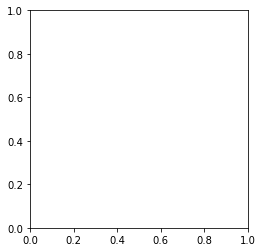

In [13]:
slices = [0.278, 0.146, 0.137, 0.082, 0.076, 0.066, 0.056, 0.043, 0.043, 0.032, 0.029, 0.011, 0.001]
activities = ['cp', 'ca', 'thal', 'age', 'oldpeak', 'thalach', 'chol', 'sex', 'slope', 'trestbps', 'exang', 'restecg', 'fbs']
cols = ['cyan','maroon','red','light green','dark blue','light blue','dark green','yellow','brown','pink','purple','turquoise','grey']
plt.pie(slices,
labels=activities,
colors=cols,
startangle=90,
shadow= True,
explode=(0,0.1,0),
autopct='%1.1f%%')
plt.title('Pie Plot')
plt.show()n

<AxesSubplot:xlabel='feature'>

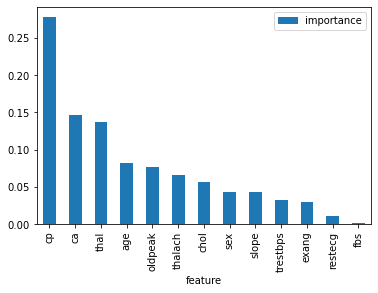

In [38]:
importance.plot.bar()